In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

from subprocess import check_output
print(check_output(["ls", "../../resources/prices"]).decode("utf8"))

coin_Aave.csv
coin_BinanceCoin.csv
coin_Bitcoin.csv
coin_Cardano.csv
coin_ChainLink.csv
coin_Cosmos.csv
coin_CryptocomCoin.csv
coin_Dogecoin.csv
coin_EOS.csv
coin_Ethereum.csv
coin_Iota.csv
coin_Litecoin.csv
coin_Monero.csv
coin_NEM.csv
coin_Polkadot.csv
coin_Solana.csv
coin_Stellar.csv
coin_Tether.csv
coin_Tron.csv
coin_USDCoin.csv
coin_Uniswap.csv
coin_WrappedBitcoin.csv
coin_XRP.csv



In [2]:
# load and inspect data
ada_df = pd.read_csv(Path('../../resources/prices/coin_Cardano.csv'), index_col='SNo')
ada_df

,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
SNo,,,,,,,,,
1,Cardano,ADA,2017-10-02 23:59:59,0.030088,0.019969,0.024607,0.025932,5.764130e+07,6.288991e+08
2,Cardano,ADA,2017-10-03 23:59:59,0.027425,0.020690,0.025757,0.020816,1.699780e+07,5.396927e+08
3,Cardano,ADA,2017-10-04 23:59:59,0.022806,0.020864,0.020864,0.021931,9.000050e+06,5.686195e+08
4,Cardano,ADA,2017-10-05 23:59:59,0.022154,0.020859,0.021951,0.021489,5.562510e+06,5.571390e+08
5,Cardano,ADA,2017-10-06 23:59:59,0.021542,0.018360,0.021359,0.018539,7.780710e+06,4.806646e+08
...,...,...,...,...,...,...,...,...,...
1241,Cardano,ADA,2021-02-23 23:59:59,1.133705,0.824145,1.098769,0.954709,1.120190e+10,2.970337e+10
1242,Cardano,ADA,2021-02-24 23:59:59,1.074832,0.902583,0.954958,1.051657,8.481335e+09,3.271965e+10
1243,Cardano,ADA,2021-02-25 23:59:59,1.172732,1.017986,1.051349,1.079116,8.248286e+09,3.357399e+10


In [3]:
ada_df['Date'] = pd.to_datetime(ada_df['Date']).dt.date
ada_df['Date'] = pd.to_datetime(ada_df['Date'])
ada_df['Spread'] = ada_df.High - ada_df.Low
ada_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1245 entries, 1 to 1245
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       1245 non-null   object        
 1   Symbol     1245 non-null   object        
 2   Date       1245 non-null   datetime64[ns]
 3   High       1245 non-null   float64       
 4   Low        1245 non-null   float64       
 5   Open       1245 non-null   float64       
 6   Close      1245 non-null   float64       
 7   Volume     1245 non-null   float64       
 8   Marketcap  1245 non-null   float64       
 9   Spread     1245 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 107.0+ KB


## Plot the closing value of Binance over time

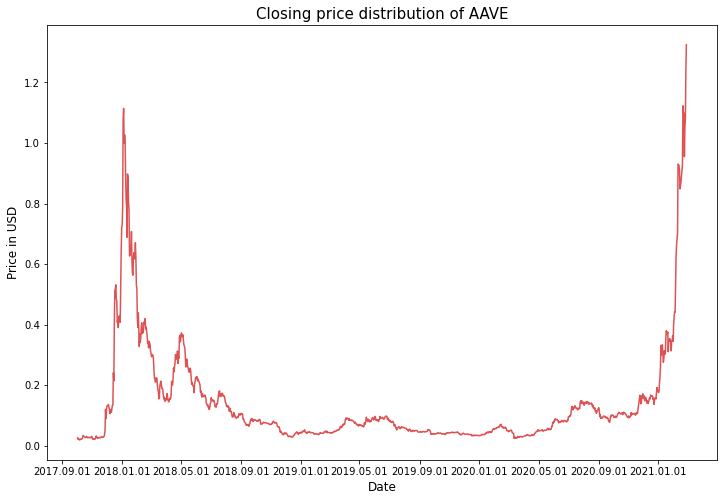

In [4]:
import matplotlib.dates as mdates
ada_df['Date_mpl'] = ada_df['Date'].apply(lambda x: mdates.date2num(x))

fig, ax = plt.subplots(figsize=(12,8))
# sns.lineplot(y = ada_df.Close.values, x=btc_df.Date_mpl.values, alpha=0.8, color=color[3])
sns.lineplot(y = ada_df.Close.values, x=ada_df.Date.values, alpha=0.8, color=color[3])
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
# fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Closing price distribution of AAVE", fontsize=15)
plt.show()

## Candlestick chart

In [5]:
import matplotlib.ticker as mticker
import mplfinance as mpf

# fig = plt.figure(figsize=(12,8))
# ax1 = plt.subplot2grid((1,1), (0,0))

temp_ada_df = ada_df.copy(deep=False)
temp_ada_df = temp_ada_df.set_index(['Date'])
temp_ada_df = temp_ada_df.drop(['Name', 'Symbol', 'Marketcap','Spread'], axis=1)
temp_ada_df

,High,Low,Open,Close,Volume,Date_mpl
Date,,,,,,
2017-10-02,0.030088,0.019969,0.024607,0.025932,5.764130e+07,17441.0
2017-10-03,0.027425,0.020690,0.025757,0.020816,1.699780e+07,17442.0
2017-10-04,0.022806,0.020864,0.020864,0.021931,9.000050e+06,17443.0
2017-10-05,0.022154,0.020859,0.021951,0.021489,5.562510e+06,17444.0
2017-10-06,0.021542,0.018360,0.021359,0.018539,7.780710e+06,17445.0
...,...,...,...,...,...,...
2021-02-23,1.133705,0.824145,1.098769,0.954709,1.120190e+10,18681.0
2021-02-24,1.074832,0.902583,0.954958,1.051657,8.481335e+09,18682.0
2021-02-25,1.172732,1.017986,1.051349,1.079116,8.248286e+09,18683.0


/Users/arttucker/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/mplfinance/_arg_validators.py:45: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  category=UserWarning)


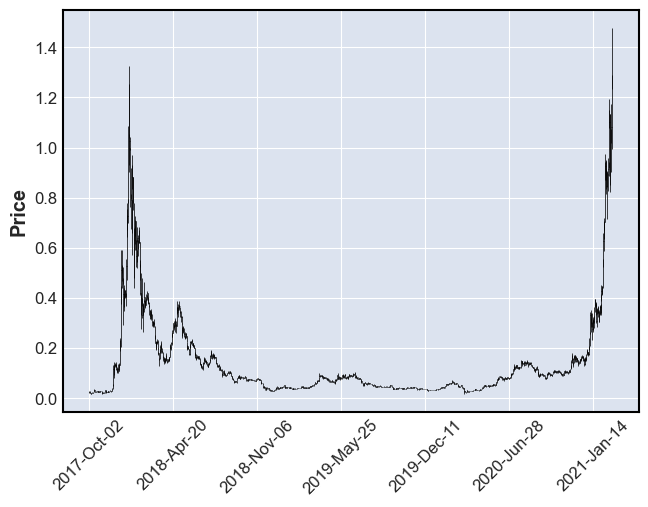

In [6]:
mpf.plot(temp_ada_df)